In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DL_notebook/creditcard (2).csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
#check null value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

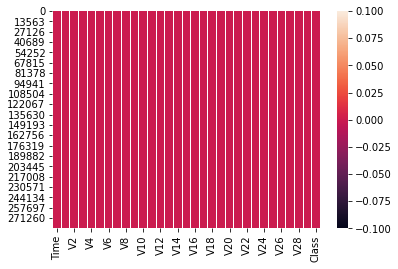

In [ ]:
#visualise null value
sns.heatmap(df.isnull())

In [ ]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

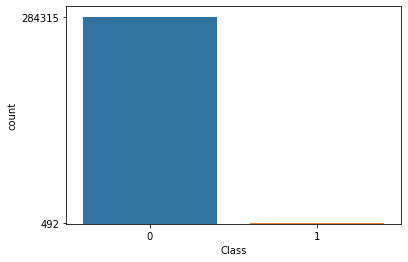

In [ ]:
#visualise
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
#seperate input and output
X=df.drop("Class",axis=1)
Y=df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#apply scaling
from sklearn.preprocessing import StandardScaler


In [ ]:
ss=StandardScaler()

In [ ]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_train

array([[ 7.20776793e-01, -9.60894470e-02,  1.22893137e-01, ...,
        -2.53567703e-02,  6.37631372e-02, -2.95042507e-01],
       [ 1.05267495e-01,  7.05116794e-04,  6.30339113e-01, ...,
        -2.35478397e-01,  1.09914126e-01, -3.16496631e-01],
       [ 1.36935421e+00,  1.05449525e+00,  4.31205341e-02, ...,
        -1.70041715e-01, -1.38329725e-01, -3.44542804e-01],
       ...,
       [-8.38458667e-01, -5.85712567e-01,  1.02671982e+00, ...,
        -3.98848474e-01,  9.03441212e-02, -3.22169788e-01],
       [ 1.42856088e+00,  8.95834165e-01, -4.23541842e-01, ...,
        -1.37986278e-02, -5.98409431e-02,  2.62899304e-02],
       [-3.43890216e-01, -3.60088146e-01,  2.98423515e-01, ...,
        -9.49926276e-01, -6.09472322e-01, -1.21531780e-01]])

In [ ]:
#!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#RandomOverSampler use 
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [ ]:
#here convert minority class: yes into majority class :no use fit_resample() inbuilt method of RandomOverSampler()
#class
X_train_1,Y_train_1=ros.fit_resample(X_train,Y_train) 
#X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(Y_train).value_counts() #check if not balance 

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
pd.Series(Y_train_1).value_counts()

1    199007
0    199007
dtype: int64

In [ ]:
pd.Series(Y_test).value_counts() #check if not balance 

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
#covert on test data
X_test_1,Y_test_1=ros.fit_resample(X_test,Y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.shape

(284807, 31)

In [ ]:
#create architecture
model=tf.keras.Sequential([
                          tf.keras.layers.Dense(64,activation='relu',input_shape=(X.shape[1],)),#input layer#1st hidden layer
                          tf.keras.layers.Dense(70,activation='relu'),
                          tf.keras.layers.Dense(50,activation='relu'),
                          tf.keras.layers.Dense(1,activation='sigmoid')  
])

In [ ]:
#summery
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,135
Trainable params: 10,135
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#calculation:
#formula=no. of neurons*no.of inputs+bias
# first input layerLayer=31*64=1984
#first  hidden layer=70*64+70=4550
# second hidden Layer=50*70+50=3550
#output layer=1*50+1=51

In [ ]:
#compile the model
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#Train the model

trained_model1 = model.fit(X_train_1, Y_train_1,batch_size=32, epochs=70,validation_data=(X_test_1, Y_test_1))

Epoch 1/70
12438/12438 [==============================] - 18s 1ms/step - loss: 0.0238 - accuracy: 0.9946 - val_loss: 3.5084 - val_accuracy: 0.9170
Epoch 2/70
12438/12438 [==============================] - 17s 1ms/step - loss: 0.0126 - accuracy: 0.9978 - val_loss: 6.1640 - val_accuracy: 0.9172
Epoch 3/70
12438/12438 [==============================] - 19s 2ms/step - loss: 0.0109 - accuracy: 0.9984 - val_loss: 7.9668 - val_accuracy: 0.9068
Epoch 4/70
12438/12438 [==============================] - 19s 2ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 7.1956 - val_accuracy: 0.9105
Epoch 5/70
12438/12438 [==============================] - 19s 2ms/step - loss: 0.0087 - accuracy: 0.9989 - val_loss: 16.0424 - val_accuracy: 0.9106
Epoch 6/70
12438/12438 [==============================] - 19s 2ms/step - loss: 0.0099 - accuracy: 0.9988 - val_loss: 10.3001 - val_accuracy: 0.9105
Epoch 7/70
12438/12438 [==============================] - 17s 1ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss:

In [ ]:
#or accuracy of training data >accuracy of testing data means model is overfit 
print("Testing Error and Accuracy of Testing Data : ",model.evaluate(X_test, Y_test) )

2671/2671 [==============================] - 2s 722us/step - loss: 2.4786 - accuracy: 0.9974
Testing Error and Accuracy of Testing Data :  [2.4785754680633545, 0.9973783493041992]


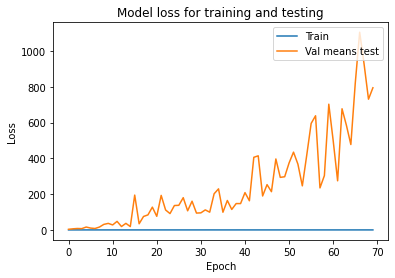

In [ ]:
#visualise training error(loss) and testing error (loss)
plt.plot(trained_model1.history['loss']) #training's loss means error
plt.plot(trained_model1.history['val_loss']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

In [ ]:
#means training's error< testing error so model is overfit
#or accuracy of training data >accuracy of testing data means model is overfit 
print("Testing Error and Accuracy of Testing Data : ",model.evaluate(X_test, Y_test) )

print("Training Error and Accuracy of Testing Data : ",model.evaluate(X_train, Y_train) )


2671/2671 [==============================] - 2s 724us/step - loss: 2.4786 - accuracy: 0.9974
Testing Error and Accuracy of Testing Data :  [2.4785754680633545, 0.9973783493041992]
6231/6231 [==============================] - 5s 722us/step - loss: 0.0129 - accuracy: 0.9977
Training Error and Accuracy of Testing Data :  [0.012853814288973808, 0.9976676106452942]


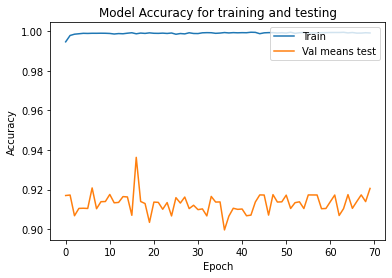

In [ ]:
#visualise training Accuracy and testing accuracy
plt.plot(trained_model1.history['accuracy']) #training's loss means error
plt.plot(trained_model1.history['val_accuracy']) #testing's loss means error
plt.title('Model Accuracy for training and testing')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

In [ ]:
#we can see , our model is overfit
#find prediction 
Y_pred=model.predict(X_test)  #give probability value Y_pred=1/(1+exp(-X))
print(Y_pred)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(Y_pred)


[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#generate report 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#score is good but not better .will do much better 
#reason : model is overfit
#apply regularisation means to reduce overfit 
#1. L1 means Lasso and L2 means Ridge and Dropout

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.36      0.84      0.50       135

    accuracy                           1.00     85443
   macro avg       0.68      0.92      0.75     85443
weighted avg       1.00      1.00      1.00     85443

[[85105   203]
 [   21   114]]


In [ ]:
from keras.layers import Dropout
from keras import regularizers
#apply regularisation and model2 user defined object of Sequential class 
model2 = tf.keras.Sequential([
tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X.shape[1],)),#first Hidden layer
    Dropout(0.5),  #50% neuron deactivate
  tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),#hidden layer2
    Dropout(0.5),
tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),#hidden layer3
    Dropout(0.5),
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),#hidden layer4
    Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),#hidden layer4
    Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)) #output layer
])

In [ ]:
#compile the model2
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Train the model

trained_model2 = model2.fit(X_train,Y_train,batch_size=32,epochs=70,validation_data=(X_test, Y_test))

Epoch 1/70
6231/6231 [==============================] - 221s 35ms/step - loss: 0.1425 - accuracy: 0.9982 - val_loss: 0.0146 - val_accuracy: 0.9984
Epoch 2/70
6231/6231 [==============================] - 226s 36ms/step - loss: 0.0157 - accuracy: 0.9982 - val_loss: 0.0132 - val_accuracy: 0.9984
Epoch 3/70
6231/6231 [==============================] - 229s 37ms/step - loss: 0.0153 - accuracy: 0.9982 - val_loss: 0.0132 - val_accuracy: 0.9984
Epoch 4/70
6231/6231 [==============================] - 228s 37ms/step - loss: 0.0151 - accuracy: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9984
Epoch 5/70
6231/6231 [==============================] - 228s 37ms/step - loss: 0.0150 - accuracy: 0.9982 - val_loss: 0.0134 - val_accuracy: 0.9984
Epoch 6/70
6231/6231 [==============================] - 230s 37ms/step - loss: 0.0150 - accuracy: 0.9982 - val_loss: 0.0129 - val_accuracy: 0.9984
Epoch 7/70
6231/6231 [==============================] - 228s 37ms/step - loss: 0.0151 - accuracy: 0.9982 - val_loss: 0

In [ ]:
print("Testing Error and Accuracy of Testing Data : ",model2.evaluate(X_test, Y_test) )
print("Training Error and Accuracy of Training Data : ",model2.evaluate(X_train, Y_train) )

2671/2671 [==============================] - 24s 9ms/step - loss: 0.0118 - accuracy: 0.9984
Testing Error and Accuracy of Testing Data :  [0.011787524446845055, 0.998420000076294]
6231/6231 [==============================] - 57s 9ms/step - loss: 0.0131 - accuracy: 0.9982
Training Error and Accuracy of Training Data :  [0.013124129734933376, 0.9982092976570129]


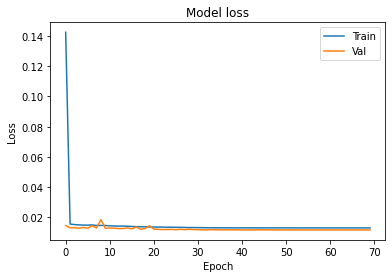

In [ ]:
plt.plot(trained_model2.history['loss']) #training
plt.plot(trained_model2.history['val_loss'])#testing
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

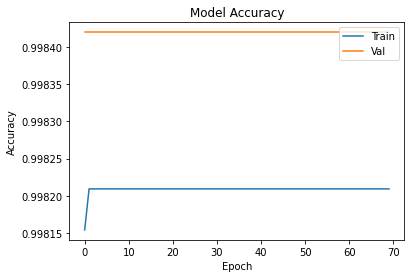

In [ ]:
plt.plot(trained_model2.history['accuracy']) #training score
plt.plot(trained_model2.history['val_accuracy'])#testing score
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
Y_pred=model2.predict(X_test)

In [ ]:
print(Y_pred)

[[0.0017527]
 [0.0017527]
 [0.0017527]
 ...
 [0.0017527]
 [0.0017527]
 [0.0017527]]


In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [ ]:
print(Y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#Generate Classification report and confusion matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

[[85308     0]
 [  135     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
